In [1]:
%matplotlib inline

import os
import sys
import math
import tables as tb
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mp_colors

In [2]:
import invisible_cities.reco.dst_functions as dstf
import invisible_cities.core.fit_functions as fitf
import antea.database.load_db              as db

from   invisible_cities.core .stat_functions    import poisson_sigma
from   invisible_cities.io   .dst_io            import load_dst

In [3]:
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = 13, 9

In [5]:
eventsPath = '/Users/carmenromoluque/nexus_petit_analysis/full-body-phantom-paper/data_coincidences/'

true_r1, true_phi1, true_z1 = [], [], []
reco_r1, reco_phi1, reco_z1 = [], [], []
true_r2, true_phi2, true_z2 = [], [], []
reco_r2, reco_phi2, reco_z2 = [], [], []

sns_response1, sns_response2    = [], []

first_sipm1, first_sipm2 = [], []
first_time1, first_time2 = [], []

true_time1, true_time2               = [], []
touched_sipms1, touched_sipms2       = [], []
max_hit_distance1, max_hit_distance2 = [], []

event_ids = []

for filename in os.listdir(eventsPath):
    if filename.endswith('000_10_4_4_4_2.npz'):
        print(filename)
    my_file   = eventsPath+filename
    d = np.load(my_file)            
    for i in d['a_true_r1']:
        true_r1.append(i)
    for i in d['a_true_r2']:
        true_r2.append(i)
    for i in d['a_true_phi1']:
        true_phi1.append(i)
    for i in d['a_true_phi2']:
        true_phi2.append(i)
    for i in d['a_true_z1']:
        true_z1.append(i)
    for i in d['a_true_z2']:
        true_z2.append(i)

    for i in d['a_reco_r1']:
        reco_r1.append(i)
    for i in d['a_reco_r2']:
        reco_r2.append(i)
    for i in d['a_reco_phi1']:
        reco_phi1.append(i)
    for i in d['a_reco_phi2']:
        reco_phi2.append(i)
    for i in d['a_reco_z1']:
        reco_z1.append(i)
    for i in d['a_reco_z2']:
        reco_z2.append(i)

    for i in d['a_touched_sipms1']:
        touched_sipms1.append(i)
    for i in d['a_touched_sipms2']:
        touched_sipms2.append(i)
    for i in d['a_sns_response1']:
        sns_response1.append(i)
    for i in d['a_sns_response2']:
        sns_response2.append(i)
        
    for i in d['a_first_sipm1']:
        first_sipm1.append(i)
    for i in d['a_first_time1']:
        first_time1.append(i)
    for i in d['a_first_sipm2']:
        first_sipm2.append(i)
    for i in d['a_first_time2']:
        first_time2.append(i)

        
    for i in d['a_true_time1']:
        true_time1.append(i)
    for i in d['a_true_time2']:
        true_time2.append(i)
    for i in d['a_max_hit_distance1']:
        max_hit_distance1.append(i)
    for i in d['a_max_hit_distance2']:
        max_hit_distance2.append(i)
    for i in d['a_event_ids']:
        event_ids.append(i)
        
        
true_r1           = np.array(true_r1)
true_phi1         = np.array(true_phi1)
true_z1           = np.array(true_z1)
reco_r1           = np.array(reco_r1)
reco_phi1         = np.array(reco_phi1)
reco_z1           = np.array(reco_z1)
sns_response1     = np.array(sns_response1)
touched_sipms1    = np.array(touched_sipms1)
first_sipm1       = np.array(first_sipm1)
first_time1       = np.array(first_time1)
true_time1        = np.array(true_time1)
max_hit_distance1 = np.array(max_hit_distance1)

true_r2           = np.array(true_r2)
true_phi2         = np.array(true_phi2)
true_z2           = np.array(true_z2)
reco_r2           = np.array(reco_r2)
reco_phi2         = np.array(reco_phi2)
reco_z2           = np.array(reco_z2)
sns_response2     = np.array(sns_response2)
touched_sipms2    = np.array(touched_sipms2)
first_sipm2       = np.array(first_sipm2)
first_time2       = np.array(first_time2)
true_time2        = np.array(true_time2)
max_hit_distance2 = np.array(max_hit_distance2)

event_ids         = np.array(event_ids)

true_x1 = true_r1*np.cos(true_phi1)
true_y1 = true_r1*np.sin(true_phi1)
true_x2 = true_r2*np.cos(true_phi2)
true_y2 = true_r2*np.sin(true_phi2)

reco_x1 = reco_r1*np.cos(reco_phi1)
reco_y1 = reco_r1*np.sin(reco_phi1)
reco_x2 = reco_r2*np.cos(reco_phi2)
reco_y2 = reco_r2*np.sin(reco_phi2)

true_x  = np.concatenate((true_x1, true_x2), axis=0)
true_y  = np.concatenate((true_y1, true_y2), axis=0)
true_z  = np.concatenate((true_z1, true_z2), axis=0)
true_r  = np.concatenate((true_r1, true_r2), axis=0)

reco_x  = np.concatenate((reco_x1, reco_x2), axis=0)
reco_y  = np.concatenate((reco_y1, reco_y2), axis=0)
reco_z  = np.concatenate((reco_z1, reco_z2), axis=0)
reco_r  = np.concatenate((reco_r1, reco_r2), axis=0)

sns_response = np.concatenate((sns_response1, sns_response2), axis=0)

full_body_phantom_paper_coincidences_jitter_sigSiPM_40_10000_10_4_4_4_2.npz
full_body_phantom_paper_coincidences_jitter_sigSiPM_40_15000_10_4_4_4_2.npz
full_body_phantom_paper_coincidences_jitter_sigSiPM_40_11000_10_4_4_4_2.npz
full_body_phantom_paper_coincidences_jitter_sigSiPM_40_14000_10_4_4_4_2.npz
full_body_phantom_paper_coincidences_jitter_sigSiPM_40_12000_10_4_4_4_2.npz
full_body_phantom_paper_coincidences_jitter_sigSiPM_40_9000_10_4_4_4_2.npz
full_body_phantom_paper_coincidences_jitter_sigSiPM_40_17000_10_4_4_4_2.npz
full_body_phantom_paper_coincidences_jitter_sigSiPM_40_13000_10_4_4_4_2.npz
full_body_phantom_paper_coincidences_jitter_sigSiPM_40_8000_10_4_4_4_2.npz
full_body_phantom_paper_coincidences_jitter_sigSiPM_40_16000_10_4_4_4_2.npz
full_body_phantom_paper_coincidences_jitter_sigSiPM_40_4000_10_4_4_4_2.npz
full_body_phantom_paper_coincidences_jitter_sigSiPM_40_1000_10_4_4_4_2.npz
full_body_phantom_paper_coincidences_jitter_sigSiPM_40_5000_10_4_4_4_2.npz
full_body_phantom

In [6]:
print(f'Number of reconstructed coincidences: {len(event_ids)}')

Number of reconstructed coincidences: 3596033


In [7]:
### change by hand phi reconstructed as true=~3.14, reco~=-3.14
reco_phi1[np.abs(reco_phi1 - true_phi1) > 6.] = -reco_phi1[np.abs(reco_phi1 - true_phi1) > 6.]
reco_phi2[np.abs(reco_phi2 - true_phi2) > 6.] = -reco_phi2[np.abs(reco_phi2 - true_phi2) > 6.]

true_x   = np.concatenate((true_x1, true_x2))
true_y   = np.concatenate((true_y1, true_y2))
true_r   = np.concatenate((true_r1, true_r2))
true_phi = np.concatenate((true_phi1, true_phi2))
true_z   = np.concatenate((true_z1, true_z2))

reco_x   = np.concatenate((reco_x1, reco_x2))
reco_y   = np.concatenate((reco_y1, reco_y2))
reco_r   = np.concatenate((reco_r1, reco_r2))
reco_phi = np.concatenate((reco_phi1, reco_phi2))
reco_z   = np.concatenate((reco_z1, reco_z2))

true_t = np.concatenate((true_time1, true_time2))
first_time = np.concatenate((first_time1, first_time2))

sns_response     = np.concatenate((sns_response1, sns_response2))
max_hit_distance = np.concatenate((max_hit_distance1, max_hit_distance2))

n_int = len(true_x) # number of interactions

In [8]:
d1 = true_r1 - reco_r1
d2 = true_r2 - reco_r2
diff_r_matrix = np.concatenate((d1, d2))

d1_phi = true_phi1 - reco_phi1
d2_phi = true_phi2 - reco_phi2
diff_phi_matrix = np.concatenate((d1_phi, d2_phi))

d1_z = true_z1 - reco_z1
d2_z = true_z2 - reco_z2
diff_z_matrix = np.concatenate((d1_z, d2_z))

In [9]:
### read sensor positions from database
DataSiPM     = db.DataSiPMsim_only('petalo', 0)
DataSiPM_idx = DataSiPM.set_index('SensorID')

speed_in_vacuum  = 0.299792458# * units.mm / units.ps
ave_speed_in_LXe = 0.210 #* units.mm / units.ps

In [10]:
### Positions
pos_1 = np.array([reco_x1, reco_y1, reco_z1]).transpose()
pos_2 = np.array([reco_x2, reco_y2, reco_z2]).transpose()

### Distance of the interaction point from the SiPM seeing the first photon
dist1 = np.linalg.norm(np.subtract(pos_1, first_sipm1), axis=1)
dist2 = np.linalg.norm(np.subtract(pos_2, first_sipm2), axis=1)

In [11]:
d1_t = true_time1 - first_time1
d2_t = true_time2 - first_time2
diff_t_matrix = (np.concatenate((d1_t, d2_t))).flatten()

reco_t1   = np.array(first_time1) - (np.array(dist1)/ave_speed_in_LXe)
reco_t2   = np.array(first_time2) - (np.array(dist2)/ave_speed_in_LXe)
d1_reco_t = true_time1 - reco_t1
d2_reco_t = true_time2 - reco_t2
diff_reco_t_matrix = (np.concatenate((d1_reco_t, d2_reco_t))).flatten()

## Some inspections of photoelectrics

1028.593
0.053190004


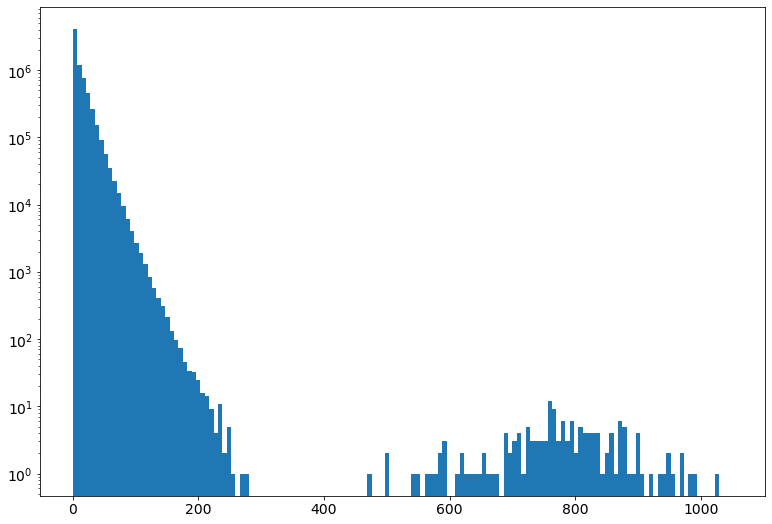

In [12]:
print(max(max_hit_distance))
print(min(max_hit_distance))
h = plt.hist(max_hit_distance, bins=150, range=(0,1050))
plt.yscale('log');

In [13]:
d1 = 1 #mm Phot like events
sel_phot_like1  = max_hit_distance < d1
sel_compt_like1 = max_hit_distance > d1

## Error matrices

### R

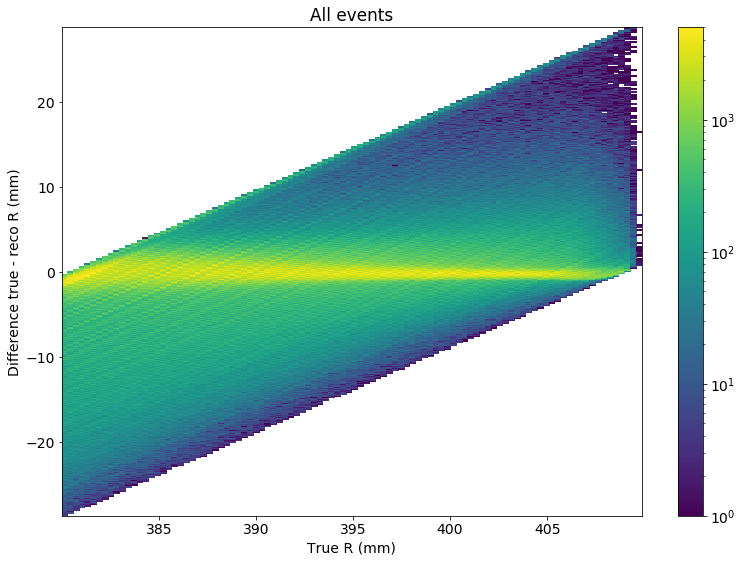

In [14]:
## all events
h_r, xedges_r, yedges_r, img_r = plt.hist2d(true_r, diff_r_matrix, bins=(100, 500), norm=mp_colors.LogNorm())
plt.title('All events')
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True R (mm)');
plt.colorbar();
#plt.ylim(-5,5)

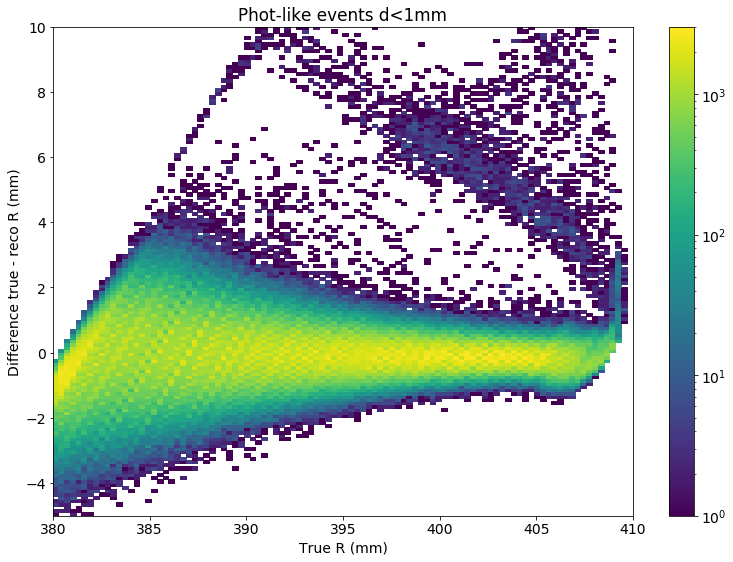

In [15]:
## Photoelectric-like events d1
h_r, xedges_r, yedges_r, img_r = plt.hist2d(true_r[sel_phot_like1],
                                            diff_r_matrix[sel_phot_like1],
                                            bins=(100, 150), 
                                            range=((380, 410), (-5, 10)),
                                            norm=mp_colors.LogNorm())
plt.title(f'Phot-like events d<{d1}mm')
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True R (mm)');
plt.colorbar();

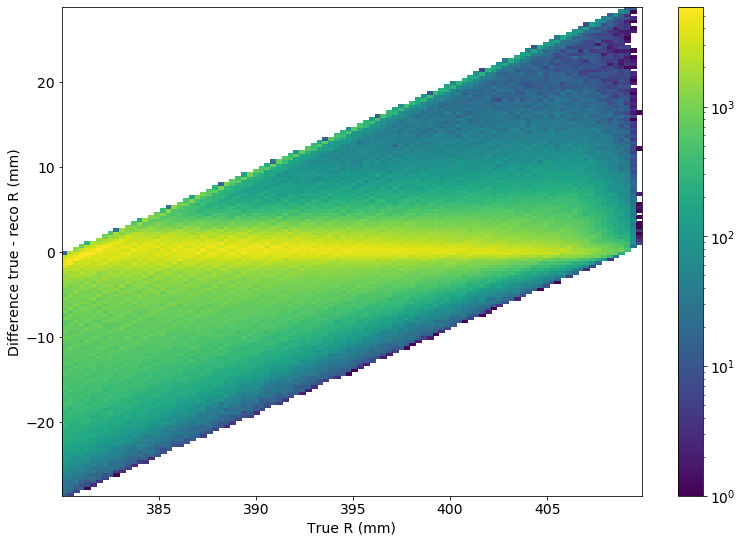

In [16]:
## not photoelectric-like events
h_r, xedges_r, yedges_r, img_r = plt.hist2d(true_r[sel_compt_like1],
                                            diff_r_matrix[sel_compt_like1],
                                            bins=(100, 150), norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco R (mm)')
plt.xlabel('True R (mm)');
plt.colorbar();

## Phi

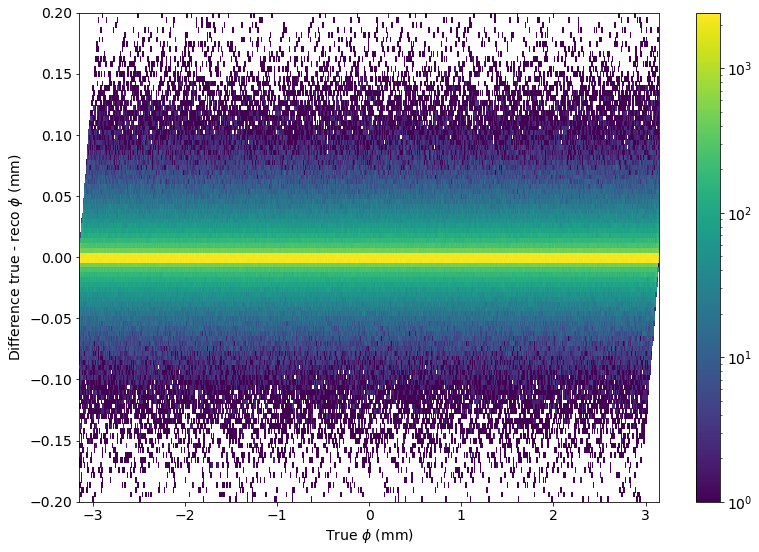

In [17]:
h_phi, xedges_phi, yedges_phi, img_phi = plt.hist2d(true_phi, 
                                                    diff_phi_matrix,
                                                    bins=(1000, 100),
                                                    range=((-3.15, 3.15), (-0.2, 0.2)), #cmin=1)
                                                    norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco $\phi$ (mm)')
plt.xlabel('True $\phi$ (mm)');
plt.colorbar();
#plt.ylim(-0.02, 0.02)

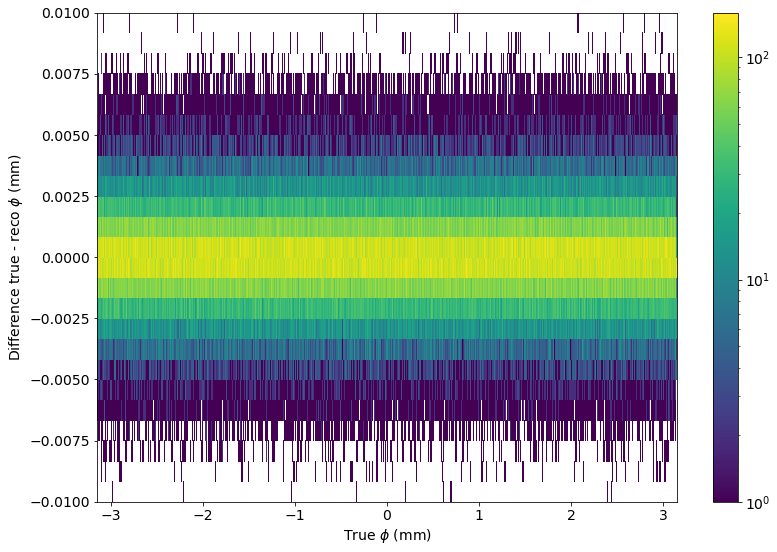

In [18]:
h_phi, xedges_phi, yedges_phi, img_phi = plt.hist2d(true_phi[sel_phot_like1], 
                                                    diff_phi_matrix[sel_phot_like1],
                                                    bins=(5166, 24), 
                                                    range=((-3.15, 3.15), (-0.01, 0.01)), #cmin=1)
                                                    norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco $\phi$ (mm)')
plt.xlabel('True $\phi$ (mm)');
plt.colorbar();
#plt.ylim(-0.02, 0.02)

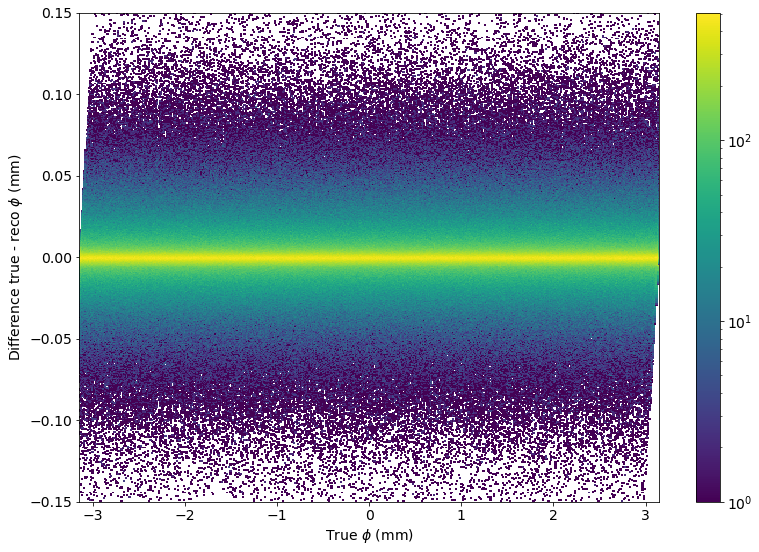

In [19]:
h_phi, xedges_phi, yedges_phi, img_phi = plt.hist2d(true_phi[sel_compt_like1], 
                                                    diff_phi_matrix[sel_compt_like1],
                                                    bins=(500, 500), 
                                                    range=((-3.15, 3.15), (-0.15, 0.15)), #cmin=1)
                                                    norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco $\phi$ (mm)')
plt.xlabel('True $\phi$ (mm)');
plt.colorbar();
#plt.ylim(-0.02, 0.02)

## Z

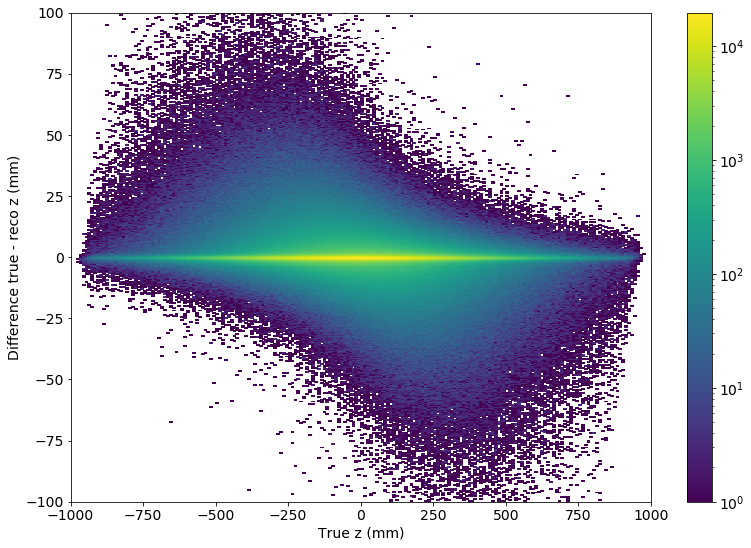

In [20]:
h_z, xedges_z, yedges_z, img_z = plt.hist2d(true_z, diff_z_matrix, bins=(200, 500),
                                            range=((-1000, 1000), (-100, 100)),
                                            norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco z (mm)')
plt.xlabel('True z (mm)')
plt.colorbar();

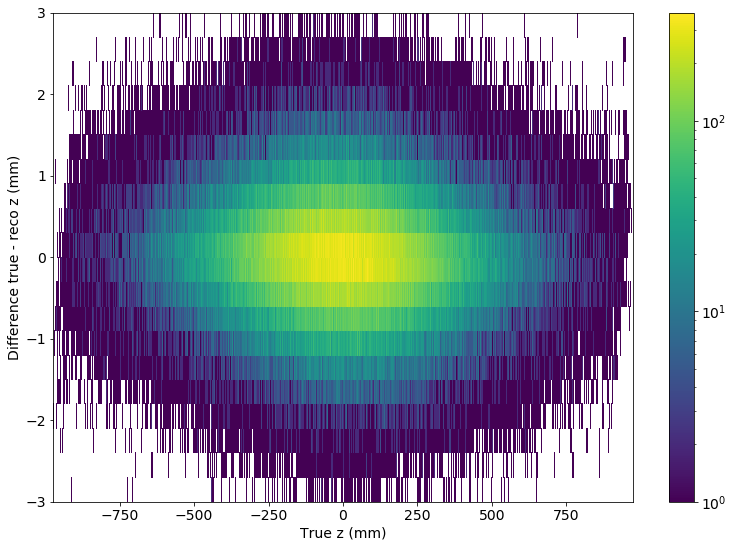

In [21]:
h_z, xedges_z, yedges_z, img_z = plt.hist2d(true_z[sel_phot_like1],
                                            diff_z_matrix[sel_phot_like1], 
                                            bins=(6500, 20),
                                            range=((-975, 975), (-3, 3)),
                                            norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco z (mm)')
plt.xlabel('True z (mm)')
plt.colorbar();

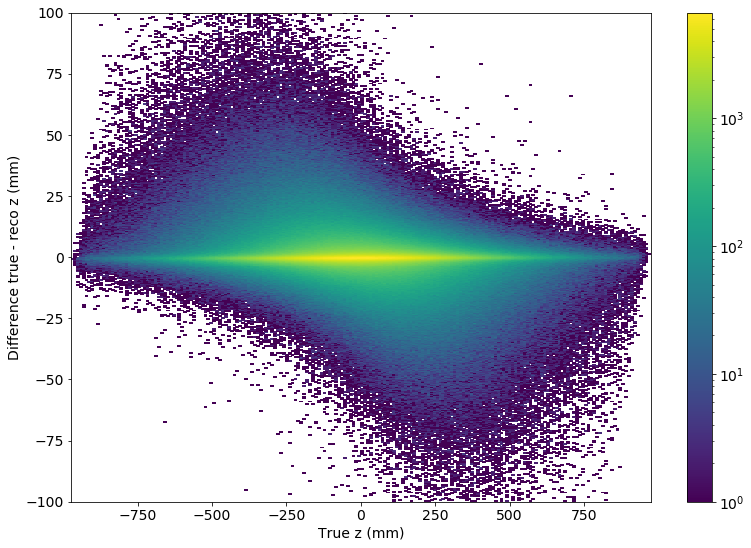

In [22]:
h_z, xedges_z, yedges_z, img_z = plt.hist2d(true_z[sel_compt_like1],
                                            diff_z_matrix[sel_compt_like1], 
                                            bins=(200, 500),
                                            range=((-975, 975), (-100, 100)),
                                            norm=mp_colors.LogNorm())
plt.ylabel('Difference true - reco z (mm)')
plt.xlabel('True z (mm)')
plt.colorbar();

## Time

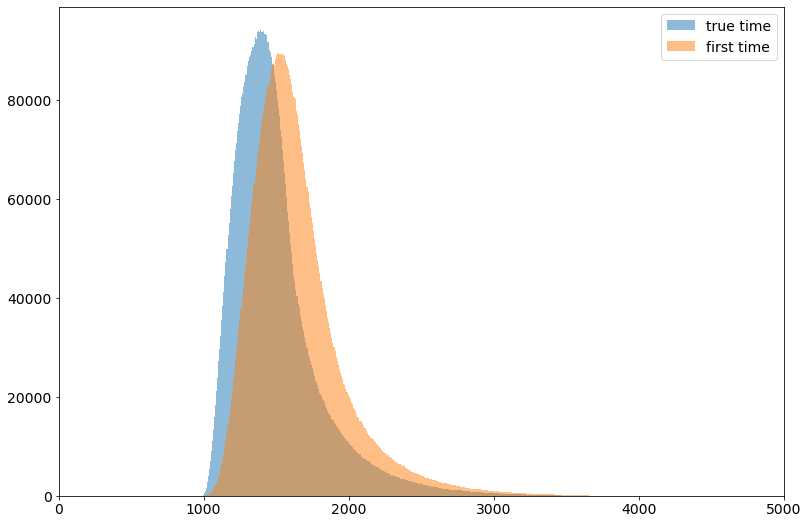

In [23]:
plt.hist(true_t,     500, alpha=0.5, label='true time')
plt.hist(first_time, 500, alpha=0.5, label='first time')
plt.xlim(0,5000)
plt.legend();

### Diff reco t matrix

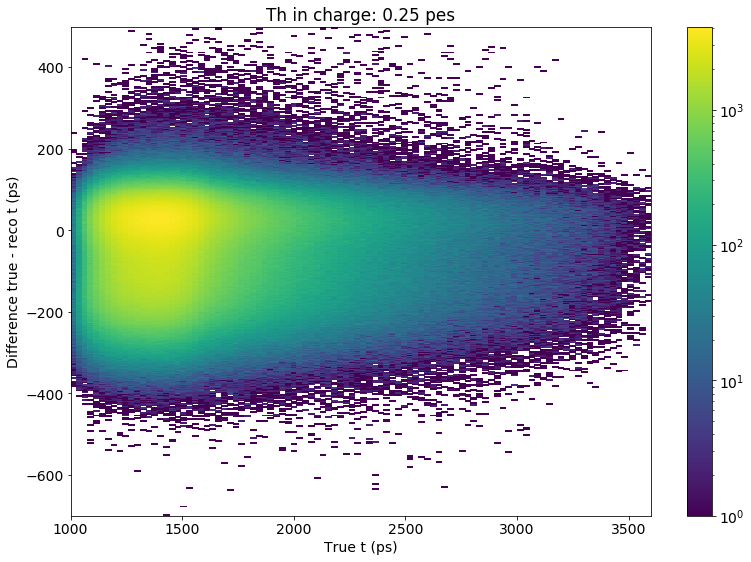

In [24]:
th = 0.25 #pes
h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t, diff_reco_t_matrix,
                                            bins=(100, 500),
                                            range=((1000, 3600), (-700, 500)),
                                            norm=mp_colors.LogNorm())
    
plt.ylabel('Difference true - reco t (ps)')
plt.xlabel('True t (ps)');
plt.title(f'Th in charge: {th} pes')
plt.colorbar()
plt.show()

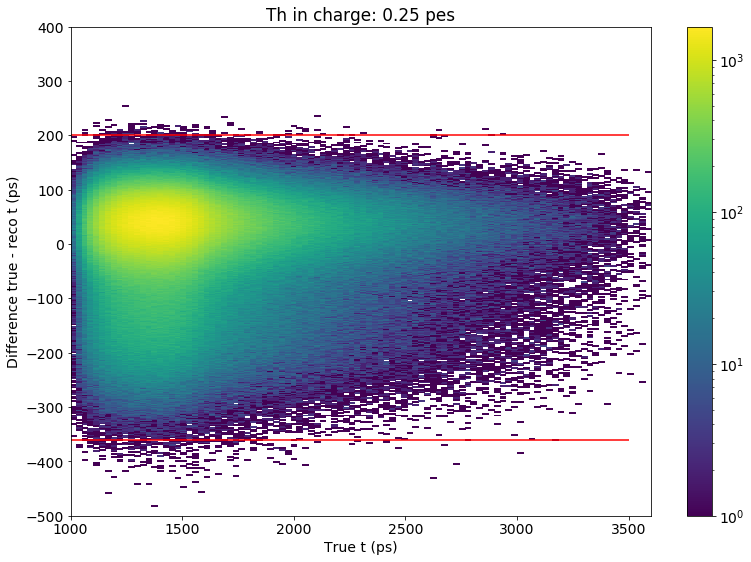

In [26]:
h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t[sel_phot_like1], 
                                            diff_reco_t_matrix[sel_phot_like1],
                                            bins=(100, 500),
                                            range=((1000, 3600), (-500, 400)),
                                            norm=mp_colors.LogNorm())
plt.hlines(200, 1000, 3500, color='r')
plt.hlines(-360, 1000, 3500, color='r')
plt.ylabel('Difference true - reco t (ps)')
plt.xlabel('True t (ps)');
plt.title(f'Th in charge: {th} pes')
plt.colorbar()
plt.show()

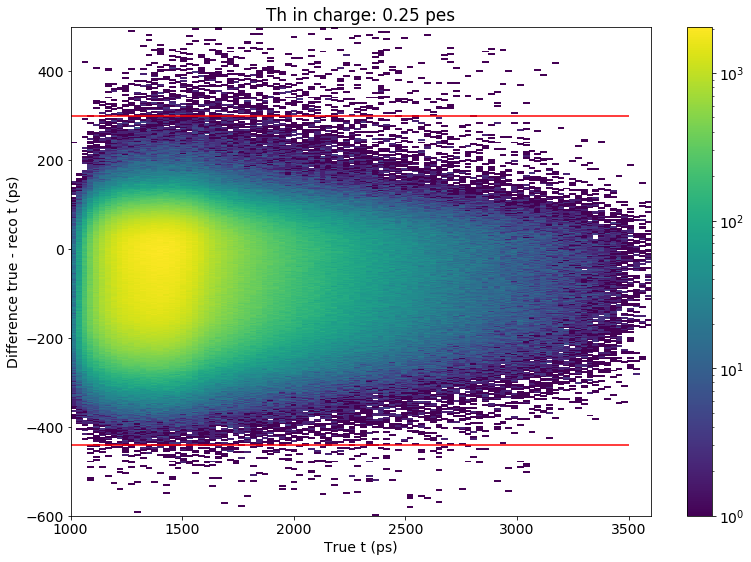

In [29]:
h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t[sel_compt_like1], 
                                            diff_reco_t_matrix[sel_compt_like1],
                                            bins=(100, 500),
                                            range=((1000, 3600), (-600, 500)),
                                            norm=mp_colors.LogNorm())
plt.hlines(300, 1000, 3500, color='r')
plt.hlines(-440, 1000, 3500, color='r')
plt.ylabel('Difference true - reco t (ps)')
plt.xlabel('True t (ps)');
plt.title(f'Th in charge: {th} pes')
plt.colorbar()
plt.show()

### Diff t matrix

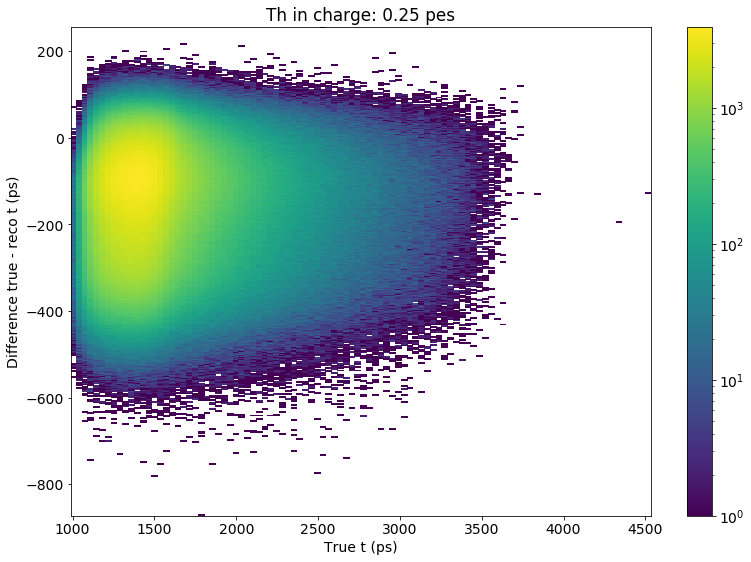

In [30]:
th = 0.25
h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t, diff_t_matrix, bins=(100, 500),
                                            norm=mp_colors.LogNorm())

#plt.xlim(1000,6000)
plt.ylabel('Difference true - reco t (ps)')
plt.xlabel('True t (ps)');
plt.title(f'Th in charge: {th} pes')
plt.colorbar()
plt.show()

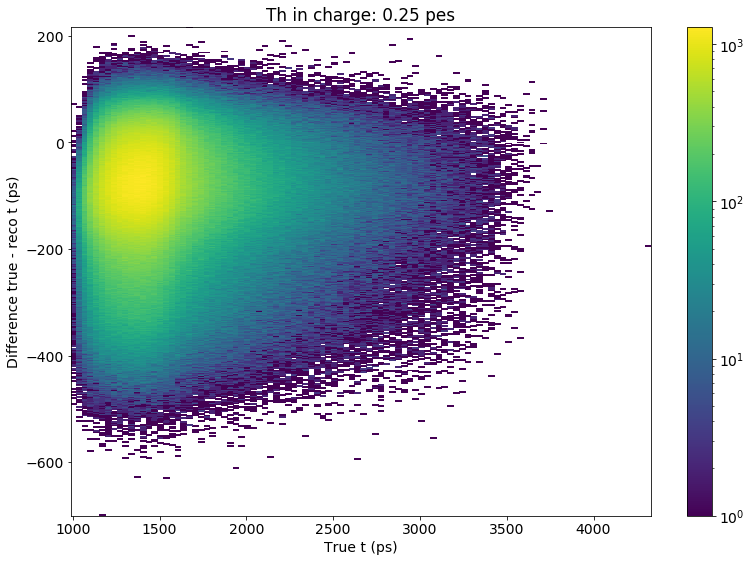

In [31]:
h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t[sel_phot_like1], 
                                            diff_t_matrix[sel_phot_like1], 
                                            bins=(100, 500),
                                            norm=mp_colors.LogNorm())

plt.ylabel('Difference true - reco t (ps)')
plt.xlabel('True t (ps)');
plt.title(f'Th in charge: {th} pes')
plt.colorbar()
plt.show()

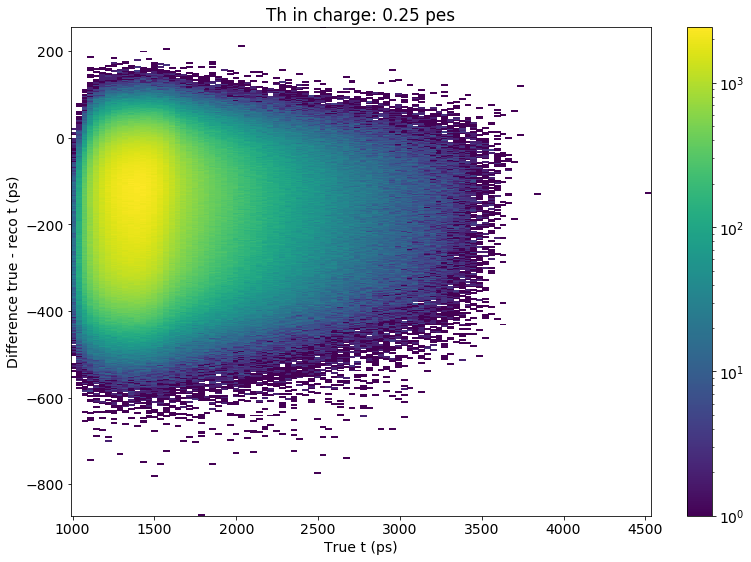

In [32]:
h_t, xedges_t, yedges_t, img_t = plt.hist2d(true_t[sel_compt_like1], 
                                            diff_t_matrix[sel_compt_like1], 
                                            bins=(100, 500),
                                            norm=mp_colors.LogNorm())

plt.ylabel('Difference true - reco t (ps)')
plt.xlabel('True t (ps)');
plt.title(f'Th in charge: {th} pes')
plt.colorbar()
plt.show()

In [ ]:
13
50
67
70
75
85
92
93
94
95
96
97
98
99
143
194
239
249
344
364
377
442
446
447
448
449
465
498
499
508
512
522
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
561
563
586
587
588
589
590
591
592
593
594
595
596
597
598
599
622
624
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
703
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
763
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
804
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999